In [2]:
import numpy as np

In [3]:
%matplotlib inline

# Playing around with sklearn tools 

Goal: use count vectorizer.

I'm following [the Learning from text chapter](https://www.packtpub.com/packtlib/book/Big%20Data%20&%20Business%20Intelligence/9781783284818/8/ch08lvl1sec78/Learning%20from%20text%20%20Naive%20Bayes%20for%20Natural%20Language%20Processing) for this purpose.

Also, a good thing to read: [preprocessing with sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder).

First, let's read the data:

In [4]:
import pandas as pd

In [5]:
df_train = pd.read_json('train.json')

The features are in the column `ingredients`.

In [6]:
df_train.ingredients.head()

0    [romaine lettuce, black olives, grape tomatoes...
1    [plain flour, ground pepper, salt, tomatoes, g...
2    [eggs, pepper, salt, mayonaise, cooking oil, g...
3                  [water, vegetable oil, wheat, salt]
4    [black pepper, shallots, cornflour, cayenne pe...
Name: ingredients, dtype: object

One ingredient is a list of strings.

In [7]:
ingr = df_train.ingredients[0]
ingr

[u'romaine lettuce',
 u'black olives',
 u'grape tomatoes',
 u'garlic',
 u'pepper',
 u'purple onion',
 u'seasoning',
 u'garbanzo beans',
 u'feta cheese crumbles']

We can fit a CountVectorizer on the features.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
cv = CountVectorizer()
X = cv.fit_transform(ingr)
X.todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

If we don't want the vectorizer to split each element, we just do the following.

In [10]:
cv2 = CountVectorizer(token_pattern=r"(?u)\b\w[\w\s]+\b")
X2 = cv2.fit_transform(ingr)
X2.todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

We can go into the details of the tokenization:

In [11]:
analyze = cv2.build_tokenizer()

In [12]:
analyze(ingr[0])

[u'romaine lettuce']

In [13]:
cv2.get_feature_names()

[u'black olives',
 u'feta cheese crumbles',
 u'garbanzo beans',
 u'garlic',
 u'grape tomatoes',
 u'pepper',
 u'purple onion',
 u'romaine lettuce',
 u'seasoning']

This allows us to very easily build our feature dictionary:

In [14]:
";".join(ingr)

u'romaine lettuce;black olives;grape tomatoes;garlic;pepper;purple onion;seasoning;garbanzo beans;feta cheese crumbles'

In [15]:
cv = CountVectorizer(token_pattern=r"(?u)\b\w[\w\s]+\b")
X = cv.fit_transform([";".join(_) for _ in df_train.ingredients])

In [16]:
X.shape

(39774, 6815)

How do we encode the labels?

In [17]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(df_train.cuisine)

Let's separate the data into training and test set.

In [18]:
from sklearn.cross_validation import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Let's train a logistic regression on this.

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

Let's evaluate our generalization error on the test set.

In [22]:
logistic.score(X_test, y_test)

0.77586423632935264

# Using every single word as features 

In [23]:
cv = CountVectorizer(strip_accents='ascii')
X = cv.fit_transform([" ".join(_) for _ in df_train.ingredients])
X.shape

(39774, 3005)

In [24]:
" ".join(ingr)

u'romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans feta cheese crumbles'

In [26]:
cv.build_analyzer()(" ".join(ingr))

[u'romaine',
 u'lettuce',
 u'black',
 u'olives',
 u'grape',
 u'tomatoes',
 u'garlic',
 u'pepper',
 u'purple',
 u'onion',
 u'seasoning',
 u'garbanzo',
 u'beans',
 u'feta',
 u'cheese',
 u'crumbles']

Let's check some random features from the dictionary of the vectorizer:

In [27]:
print(np.random.choice(cv.get_feature_names(), 100))

[u'glaze' u'bbq' u'muenster' u'pressed' u'stickers' u'sardi' u'habanero'
 u'bottoms' u'seven' u'pods' u'espelette' u'yu' u'peppered' u'clamato'
 u'nuoc' u'angel' u'minicub' u'stew' u'butter' u'french' u'ibarra'
 u'absinthe' u'york' u'phoran' u'croutons' u'sriracha' u'kirschenliqueur'
 u'pickled' u'zest' u'mexico' u'club' u'honeydew' u'flowerets' u'ginseng'
 u'pecorino' u'longaniza' u'crab' u'chayotes' u'raki' u'road' u'sections'
 u'marcona' u'roasting' u'arame' u'radishes' u'orgeat' u'poolish' u'panela'
 u'savoiardi' u'neem' u'up' u'steaks' u'lemon' u'tradit' u'home' u'chuck'
 u'disco' u'crumbled' u'granary' u'croissant' u'arctic' u'soften' u'hogue'
 u'liverwurst' u'cajun' u'jerusalem' u'medal' u'brewed' u'pulp' u'hearts'
 u'chutney' u'foie' u'mussels' u'filet' u'crescent' u'despelette'
 u'baileys' u'tzatziki' u'orecchiette' u'krispies' u'octopuses'
 u'komatsuna' u'rib' u'pina' u'bottle' u'tips' u'annatto' u'creations'
 u'mirlitons' u'korma' u'cannelloni' u'serrano' u'betty' u'uni' u's

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

What's the error?

In [30]:
logistic.score(X_test, y_test)

0.78365807668133247

Let's take that idea and fit a classifier trained with all the data.

In [31]:
df_test = pd.read_json('test.json')
logistic.fit(X, y)
X_submit = cv.transform([" ".join(_) for _ in df_test.ingredients])
y_submit = logistic.predict(X_submit)

In [32]:
def write_submission(y_submit, submission_filename='submission.csv'):
    with open(submission_filename, 'w') as f:
        f.write("id,cuisine\n")
        for i, idx in zip(df_test.id, y_submit):
            f.write("{},{}\n".format(i, enc.classes_[idx]))

In [33]:
write_submission(y_submit, submission_filename="submission_betterFeatures.csv")

# Using more features 

In [81]:
import matplotlib.pyplot as plt

We get a lot more features if we use ngrams.

In [114]:
cv = CountVectorizer(strip_accents='ascii', ngram_range=(1, 2))
X = cv.fit_transform([" ".join(_) for _ in df_train.ingredients])
X.shape

(39774, 81024)

But we can't keep them all. Let's remove some of the less used.

In [115]:
counts = np.array(X.sum(axis=0))[0, :].copy()
counts.shape

(81024L,)

In [116]:
counts.mean()

19.707543443917853

In [117]:
counts.max()

25742

In [118]:
counts.min()

1

In [119]:
counts.sort()

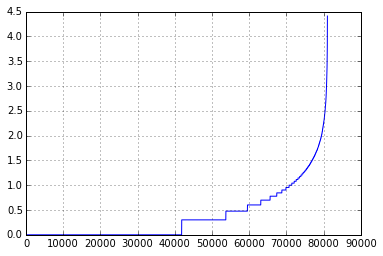

In [120]:
plt.plot(np.log10(counts))
plt.grid(True)

Let's restrict the number of features.

In [121]:
X = X[:, np.log10(counts) < 4]

In [122]:
X.shape

(39774, 79419)

And now, let's retrain.

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [124]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

Our new score is:

In [125]:
logistic.score(X_test, y_test)

0.78189817724701449

In [126]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [127]:
svc.score(X_test, y_test)

0.19849151477058455